<a href="https://colab.research.google.com/github/gmdeorozco/Diabetes-Regression-Algorithms-Comparison/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression Analysis on Diabetes Dataset

Welcome to the Jupyter notebook for Regression Analysis on the Diabetes dataset! In this notebook, we will explore the application of regression algorithms to predict the disease progression of diabetes patients based on various medical features.

### The Dataset

The Diabetes dataset contains ten baseline variables and one target variable, making it a perfect fit for regression analysis. The ten baseline variables include features such as age, gender, body mass index (BMI), blood pressure, and blood serum measurements. The target variable is a quantitative measure of disease progression one year after baseline. By leveraging regression techniques, we aim to build a model that can accurately predict the disease progression for new patients based on their medical attributes.

### The Objective

Our primary objective in this notebook is to:

1. Load and explore the Diabetes dataset to understand its structure and characteristics.
2. Perform data preprocessing, if necessary, to prepare the data for regression modeling.
3. Implement and train various regression algorithms, such as Linear Regression, Ridge Regression, Lasso Regression, or any other regression technique of interest.
4. Evaluate the performance of each regression model using appropriate metrics, such as Mean Squared Error (MSE) or R-squared.
5. Compare the results of different regression algorithms and select the most suitable model for predicting disease progression.

### Notebook Structure

The notebook is organized into different sections, each focusing on a specific aspect of regression analysis. We will guide you through the process step-by-step, providing explanations and code examples along the way. By the end of this notebook, you will have gained valuable insights into applying regression algorithms on real-world medical data.

### Let's Get Started!

It's time to dive into the world of regression analysis and explore how we can use machine learning techniques to predict diabetes disease progression. Let's load the dataset, preprocess the data, and begin our journey towards building accurate regression models!

Note: Before running any code cells, ensure that you have installed the necessary libraries, including scikit-learn and pandas, to work with regression models and manipulate data effectively.


1. **Data Loading**

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
data = load_diabetes()
X, y = data.data, data.target

### Looking for Correlations

2. **Data Preprocessing**

In [52]:
# Data preprocessing: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [53]:
# Convert X into a pandas DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)
X_scaled.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [54]:
# Convert y into a pandas DataFrame
y_df = pd.Series(y, name='Target')
y_df.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: Target, dtype: float64

In [55]:
df = pd.concat([X_scaled, y_df], axis=1)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0


bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: Target, dtype: float64


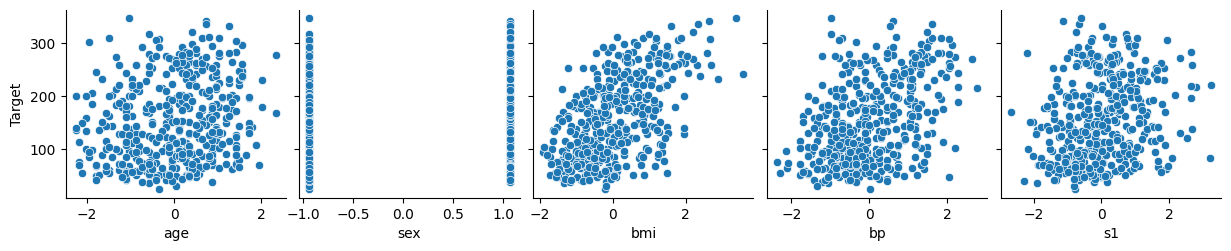

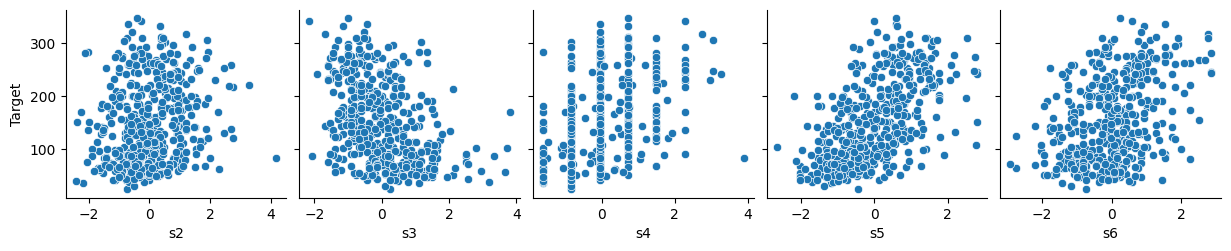

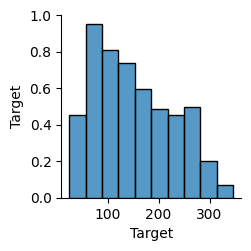

In [65]:

data_num = df.select_dtypes(include = ['float64', 'int64'])
data_corr = data_num.corr()['Target'][:-1]
top_features = data_corr[ abs(data_corr > 0)].sort_values(ascending=False)
print(top_features)

for d in range(0, len(data_num.columns), 5):
  sns.pairplot(data= data_num,
               x_vars= data_num.columns[d:d+5],
               y_vars=['Target'])



3. **Train-Test Split**: To evaluate the performance of our regression models, we split the dataset into training and testing subsets using `train_test_split`. The training set is used to train the regression model, while the testing set will assess its performance on unseen data.



In [61]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_df, test_size=0.2, random_state=42)

4. **Linear Regression Model**: We create a Linear Regression model using scikit-learn's `LinearRegression` class. The model is trained on the training data using the `fit` method.


In [62]:

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

5. **Prediction and Evaluation**: With the trained Linear Regression model, we make predictions on the test set using the `predict` method. We then evaluate the model's performance using two common regression metrics: Mean Squared Error (MSE) and R-squared (R2).

In [63]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2900.193628493481
R-squared: 0.4526027629719196
